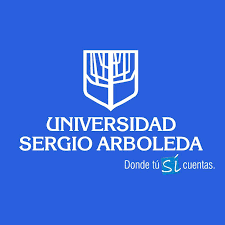

###***Integrantes:***

* Santiago Niño
* Esteban Rodriguez
* Daniel Velasquez
* Laura Ojeda

###***TALLER***

**Solucione:**

**1.** Tomando Internet como un sistema complejo, diseñe una simulación para medir que tan robusto es el sistema.

**2.** Considerando el concepto de redes booleanas, y el concepto de Robustez, diseñe una red booleana y haga la medición de la antifragilidad.



In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random

La clase **InternetSystem** encapsula la lógica relacionada con la simulación y visualización de un sistema de Internet como un grafo, lo que facilita la manipulación y comprensión del sistema en un entorno de programación.

In [ ]:
class InternetSystem:
    def __init__(self, nodes, connections):
        self.nodes = nodes
        self.connections = connections

    def simulate_failure(self):
        # Simulate node failure
        failed_node = random.choice(self.nodes)
        self.nodes.remove(failed_node)
        print("Node", failed_node, "has failed.")

    def simulate_attack(self):
        # Simulate connection attack
        attacked_connection = random.choice(self.connections)
        self.connections.remove(attacked_connection)
        print("Connection", attacked_connection, "is under attack.")

    def draw_network(self):
        G = nx.Graph()
        G.add_nodes_from(self.nodes)
        G.add_edges_from(self.connections)
        nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold')
        plt.title('Internet System')
        plt.show()

Esta clase, **BooleanNetwork**, representa una red booleana y proporciona funcionalidades para actualizar los valores de las variables en función de las conexiones definidas en la red, así como para visualizar la red como un grafo dirigido.

In [ ]:
class BooleanNetwork:
    def __init__(self, variables, connections):
        self.variables = variables
        self.connections = connections

    def update(self, input_values):
        # Update variable values based on connections and input values
        for variable in self.variables:
            input_nodes = [node for node, _ in self.connections[variable]]
            input_values_for_variable = [input_values[node] for node in input_nodes]
            updated_value = all(input_values_for_variable)
            input_values[variable] = updated_value

    def draw_network(self):
        G = nx.DiGraph()
        G.add_nodes_from(self.variables)
        for variable, conn_list in self.connections.items():
            for conn in conn_list:
                G.add_edge(conn[0], variable)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1000, font_size=12, font_weight='bold', arrowsize=20)
        plt.title('Boolean Network')
        plt.show()

**Ejemplo de uso para el sistema de Internet**

* Esta parte del código muestra un ejemplo de cómo se utiliza la clase **InternetSystem** para simular un sistema de Internet y visualizar su estado inicial y actualizado.

Estado inicial del sistema de Internet:
Nodos: [1, 2, 3, 4, 5]
Conexiones: [(1, 2), (2, 3), (3, 4), (4, 5)]
Node 4 has failed.
Connection (2, 3) is under attack.
Estado actualizado del sistema de Internet:
Nodos: [1, 2, 3, 5]
Conexiones: [(1, 2), (3, 4), (4, 5)]


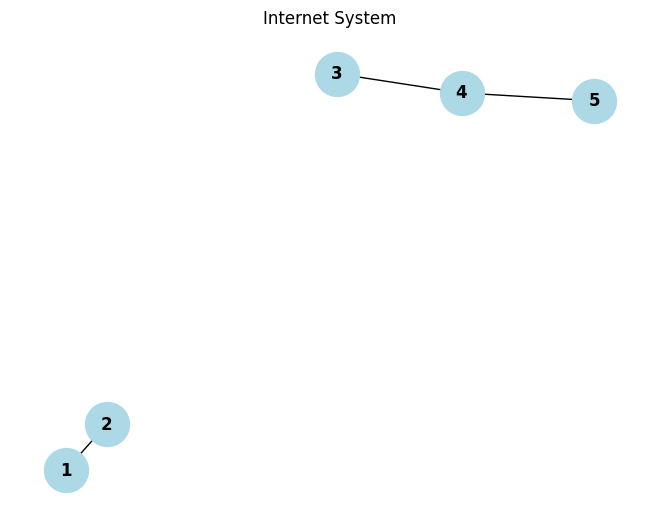

In [ ]:

nodes = [1, 2, 3, 4, 5]
connections = [(1, 2), (2, 3), (3, 4), (4, 5)]
internet = InternetSystem(nodes, connections)

print("Estado inicial del sistema de Internet:")
print("Nodos:", internet.nodes)
print("Conexiones:", internet.connections)

internet.simulate_failure()
internet.simulate_attack()

print("Estado actualizado del sistema de Internet:")
print("Nodos:", internet.nodes)
print("Conexiones:", internet.connections)

internet.draw_network()

Estos resultados describen la **evolución de un sistema de Internet** después de una simulación de falla de nodo y ataque a una conexión. Aquí está su significado:

1. **Estado inicial del sistema de Internet:**
* El sistema comienza con cinco nodos numerados del 1 al 5 y conexiones entre ellos, como se muestra en la lista de nodos y conexiones.

* Cada nodo está conectado al siguiente nodo en la lista, formando una conexión lineal.

2. **Simulación de falla y ataque:**
* Durante la simulación, se produce una falla en el nodo 4, lo que resulta en la eliminación de este nodo de la lista de nodos.

* Además, se simula un ataque a la conexión entre los nodos 2 y 3, lo que resulta en la eliminación de esta conexión de la lista de conexiones.

3. **Estado actualizado del sistema de Internet:**
* Después de la simulación, se muestra el estado actualizado del sistema de Internet, con el nodo 4 eliminado de la lista de nodos y la conexión entre los nodos 2 y 3 eliminada de la lista de conexiones.

* Los nodos restantes y las conexiones entre ellos se muestran en la lista actualizada.

Estos resultados indican cómo la estructura y la conectividad del sistema de Internet cambian después de una falla de nodo y un ataque a una conexión, lo que puede tener implicaciones significativas en la operación y la eficiencia del sistema.

**Ejemplo de uso para la red booleana**

* Esta parte del código muestra un ejemplo de cómo se utiliza la clase BooleanNetwork para simular una red booleana y visualizar su estado inicial y actualizado.


Valores iniciales de las variables: {'A': True, 'B': True, 'C': True}
Valores actualizados de las variables después de una iteración: {'A': True, 'B': True, 'C': True}


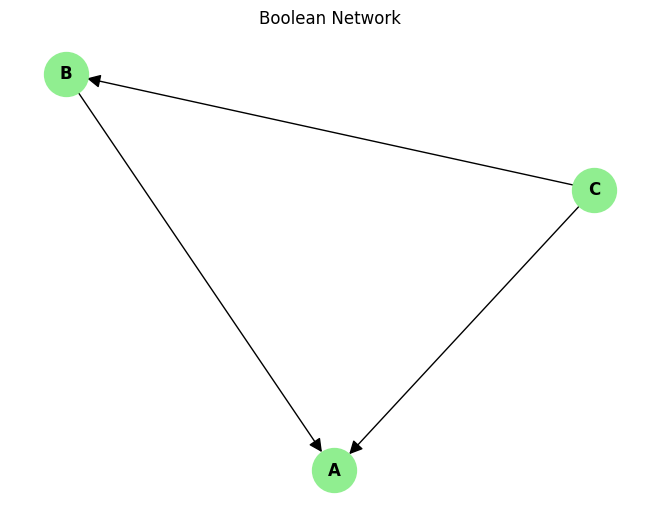

In [ ]:
variables = ['A', 'B', 'C']
connections = {
    'A': [('B', True), ('C', False)],
    'B': [('C', True)],
    'C': []
}
boolean_network = BooleanNetwork(variables, connections)

print("Valores iniciales de las variables:", input_values)

boolean_network.update(input_values)
print("Valores actualizados de las variables después de una iteración:", input_values)

boolean_network.draw_network()


Estos resultados muestran la **evolución de las variables en una red booleana** después de una iteración de actualización. Aquí está su significado:

1. **Valores iniciales de las variables:**
* Se proporcionan los valores iniciales de las variables booleanas en la red. En este caso, las variables A, B y C están inicializadas como verdaderas (True).

2. **Valores actualizados de las variables después de una iteración:**
* Después de una iteración de actualización, los valores de las variables no han cambiado. Esto significa que, en esta iteración específica, no se produjeron cambios en las relaciones lógicas entre las variables que requirieran una actualización de los valores.

* Los valores de las variables A, B y C siguen siendo verdaderos (True) después de la iteración.

Estos resultados indican que no hubo cambios en los valores de las variables después de una iteración en la red booleana, lo que sugiere que las relaciones lógicas entre las variables no se vieron afectadas en esta iteración particular.

**Conclusión**

* En el sistema de Internet, la simulación muestra cómo el sistema responde a la falla de un nodo y al ataque a una conexión, lo que resulta en cambios en la topología del sistema.

* En la red booleana, los valores de las variables no cambian después de una iteración, lo que sugiere que las relaciones lógicas entre las variables no se vieron afectadas en esta iteración particular.